In [ ]:
import numpy as np # linear algebra
import pandas as pd 

In [ ]:
# dowload dataset
train_df= pd.read_csv('../content/drive/MyDrive/Colab Notebooks/dataset/liar_dataset/train.tsv', delimiter='\t', header = None)
test_df= pd.read_csv('../content/drive/MyDrive/Colab Notebooks/dataset/liar_dataset/test.tsv', delimiter='\t', header = None)


In [ ]:
train_df.drop([0],axis=1,inplace=True)
train_df.drop([3],axis=1,inplace=True)
train_df.drop([4],axis=1,inplace=True)
train_df.drop([5],axis=1,inplace=True)
train_df.drop([6],axis=1,inplace=True)
train_df.drop([7],axis=1,inplace=True)
train_df.drop([8],axis=1,inplace=True)
train_df.drop([9],axis=1,inplace=True)
train_df.drop([10],axis=1,inplace=True)
train_df.drop([11],axis=1,inplace=True)
train_df.drop([12],axis=1,inplace=True)
train_df.drop([13],axis=1,inplace=True)
train_df.head()

1                                                  2
0        false  Says the Annies List political group supports ...
1    half-true  When did the decline of coal start? It started...
2  mostly-true  Hillary Clinton agrees with John McCain "by vo...
3        false  Health care reform legislation is likely to ma...
4    half-true  The economic turnaround started at the end of ...

In [ ]:
test_df.drop([0],axis=1,inplace=True)
test_df.drop([3],axis=1,inplace=True)
test_df.drop([4],axis=1,inplace=True)
test_df.drop([5],axis=1,inplace=True)
test_df.drop([6],axis=1,inplace=True)
test_df.drop([7],axis=1,inplace=True)
test_df.drop([8],axis=1,inplace=True)
test_df.drop([9],axis=1,inplace=True)
test_df.drop([10],axis=1,inplace=True)
test_df.drop([11],axis=1,inplace=True)
test_df.drop([12],axis=1,inplace=True)
test_df.drop([13],axis=1,inplace=True)
test_df.head()

1                                                  2
0        true  Building a wall on the U.S.-Mexico border will...
1       false  Wisconsin is on pace to double the number of l...
2       false  Says John McCain has done nothing to help the ...
3   half-true  Suzanne Bonamici supports a plan that will cut...
4  pants-fire  When asked by a reporter whether hes at the ce...

In [ ]:
def map_f(x):
    if x=='mostly-true' or x == 'true':
        return 0
    else:
        return 1
    
train = pd.DataFrame()
valid = pd.DataFrame()
test = pd.DataFrame()

train['text'] = train_df[2]
train['label'] = train_df[1].apply(map_f)



test['text'] = test_df[2]
test['label'] = test_df[1].apply(map_f)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import nltk 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data=train
data

text  label
0      Says the Annies List political group supports ...      1
1      When did the decline of coal start? It started...      1
2      Hillary Clinton agrees with John McCain "by vo...      0
3      Health care reform legislation is likely to ma...      1
4      The economic turnaround started at the end of ...      1
...                                                  ...    ...
10235  There are a larger number of shark attacks in ...      0
10236  Democrats have now become the party of the [At...      0
10237  Says an alternative to Social Security that op...      1
10238  On lifting the U.S. Cuban embargo and allowing...      1
10239  The Department of Veterans Affairs has a manua...      1

[10240 rows x 2 columns]

In [ ]:
# Let's do some statistics of the text columns
txt_len = data.text.str.split().str.len()
txt_len.describe()

count    10240.000000
mean        18.010059
std          9.658572
min          2.000000
25%         12.000000
50%         17.000000
75%         22.000000
max        467.000000
Name: text, dtype: float64

In [ ]:
print("Shape of dataset ", data.shape)
print("Columns ", data.columns)

Shape of dataset  (10240, 2)
Columns  Index(['text', 'label'], dtype='object')


In [ ]:
# Class Distribution
# 1: Unreliable
# 2: Reliable
sns.countplot(x='label', data= data)

In [ ]:
print(data.label.value_counts())
print()
print(round(data.label.value_counts(normalize=True),2)*100)

1    6602
0    3638
Name: label, dtype: int64

1    64.0
0    36.0
Name: label, dtype: float64


In [ ]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
categorical_features = []
target_col = ['label']
text_f = [ 'text']

In [ ]:
# cleaning
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()

stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)



# impute null values with none
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(),col] = "None"
    return feature_df

# clean_data
def clean_dataset(df):  
    #impute null value
    df = null_process(df)
    
    return df

# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

## Nltk Preprocessing include:
# Stop words, Stemming and Lemmetization
# For our project we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [ ]:
df = clean_dataset(data)
df['text'] = df.text.apply(nltk_preprocess)


In [ ]:
df.head()

text  label
0  say annies list political group support thirdt...      1
1  decline coal start started natural gas took st...      1
2  hillary clinton agrees john mccain voting give...      0
3  health care reform legislation likely mandate ...      1
4               economic turnaround started end term      1

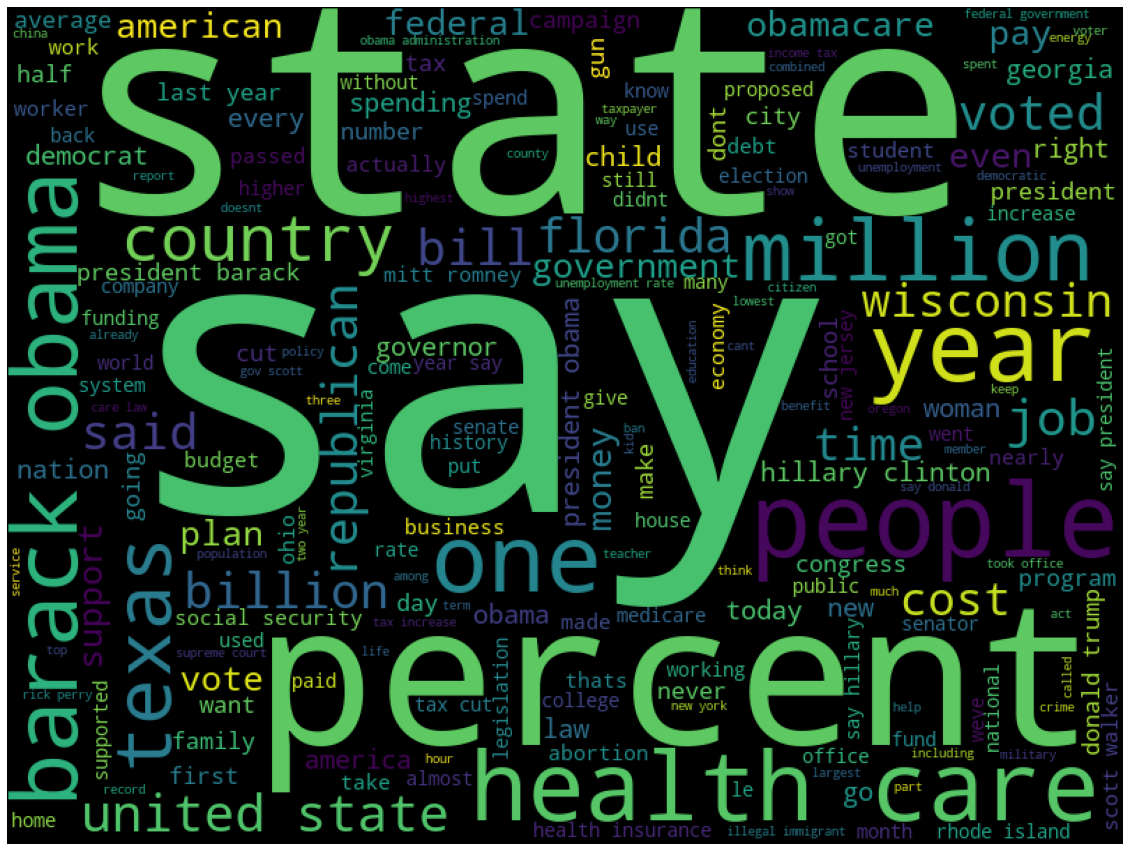

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# initialize the word cloud
wordcloud = WordCloud(background_color='black', width=800, height=600)
# generate the word cloud
text_cloud = wordcloud.generate(" ".join(df['text']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

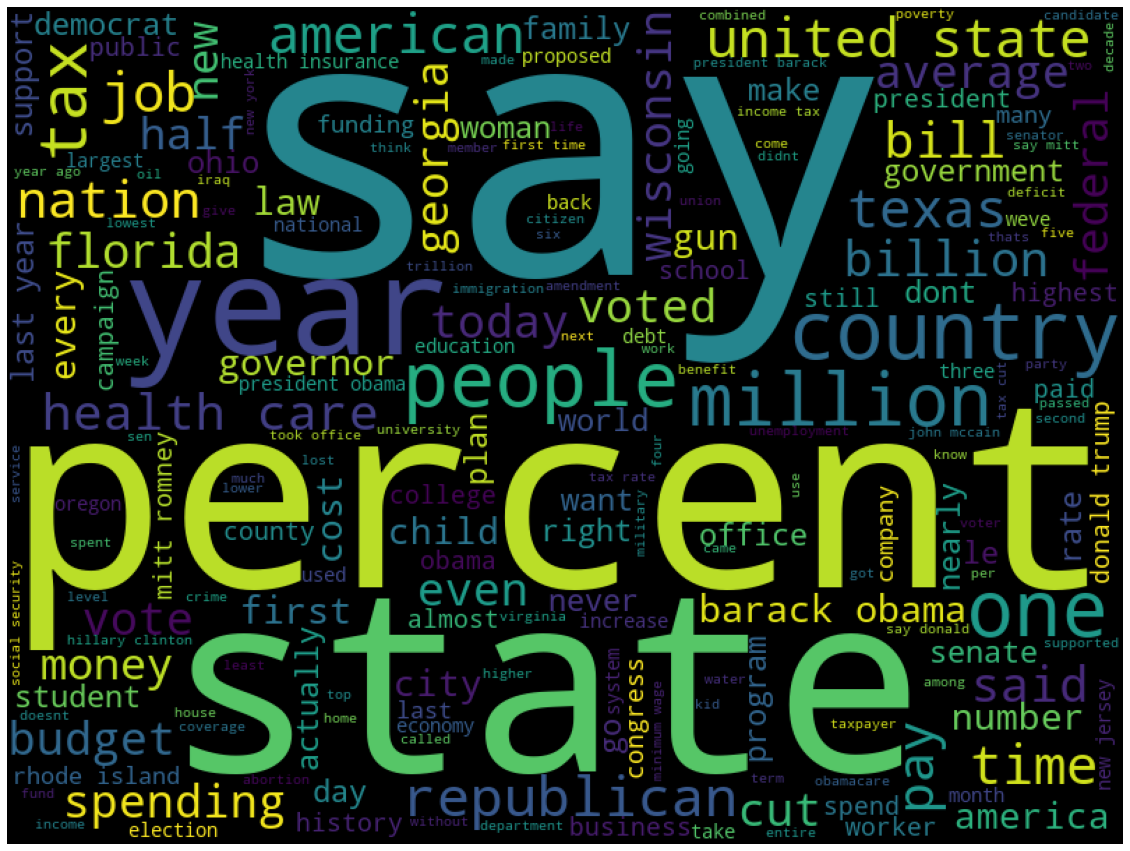

In [ ]:
# reliable news (0)
reliable_news = " ".join(df[df['label']==0]['text'])
wc = wordcloud.generate(reliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

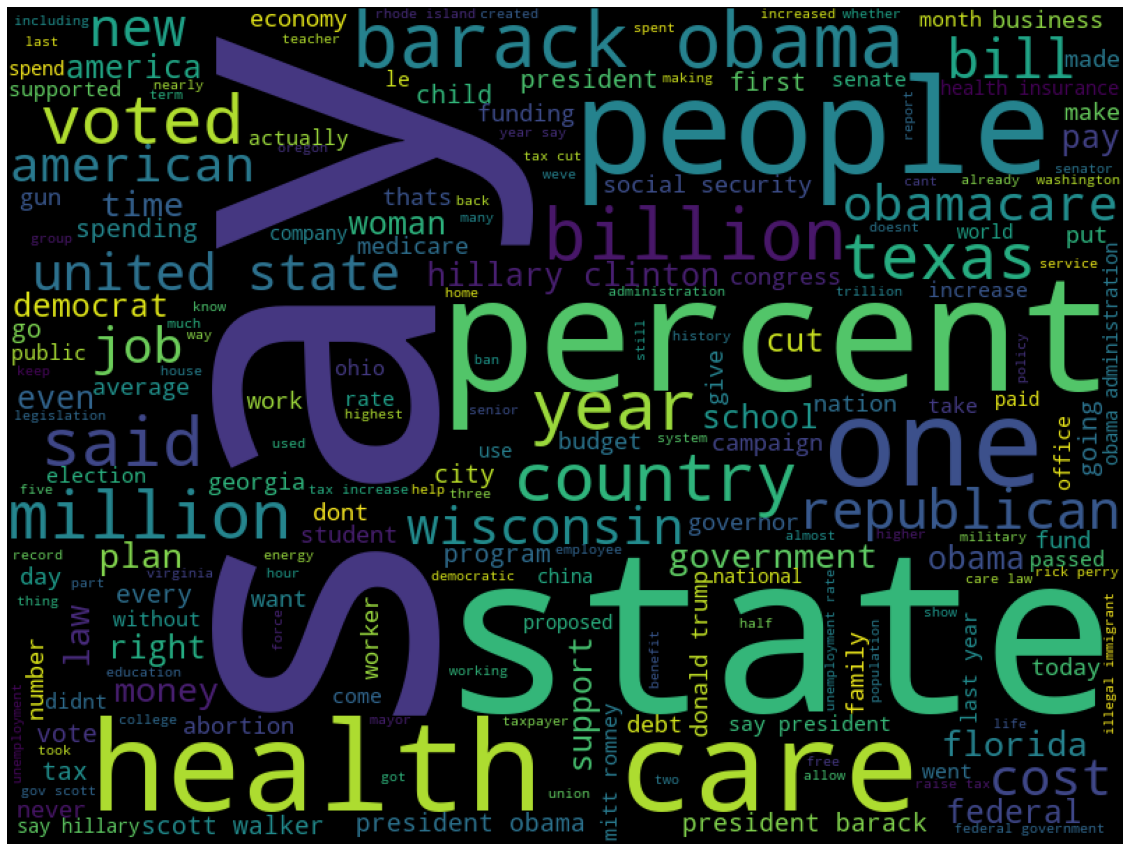

In [ ]:
# unreliable news (1)
unreliable_news  = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(unreliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

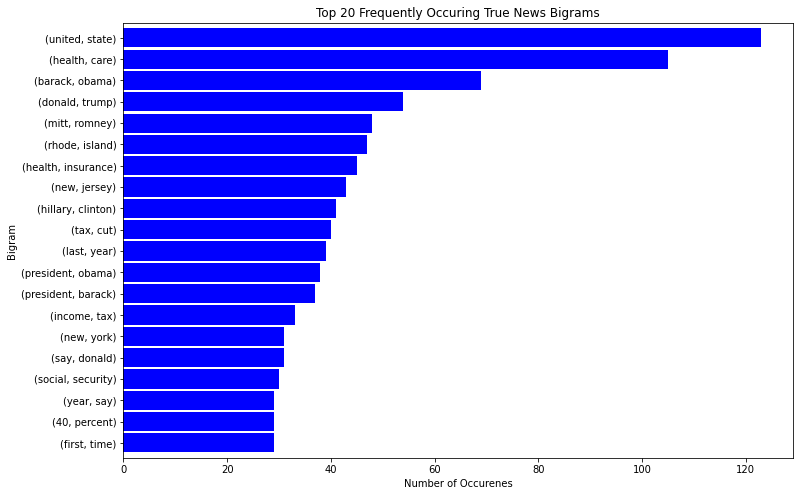

In [ ]:
# Bigram 

def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurenes", n =2):
    true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
    true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
    
    
plot_top_ngrams(reliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=2)

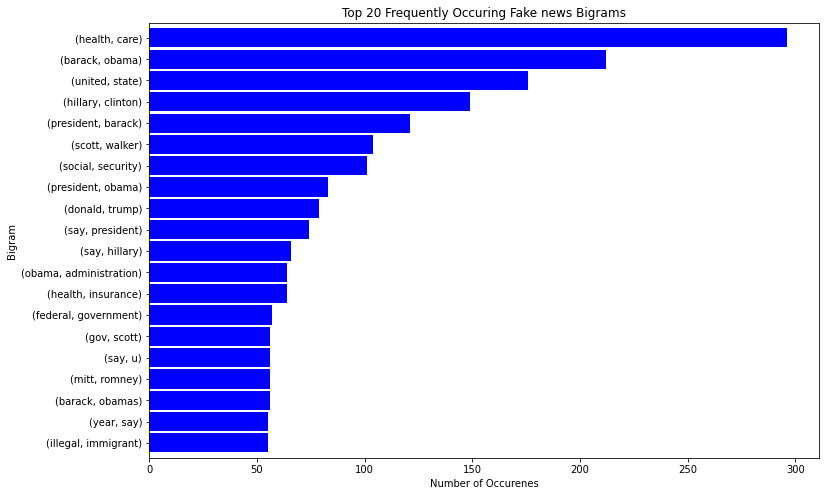

In [ ]:
plot_top_ngrams(unreliable_news, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

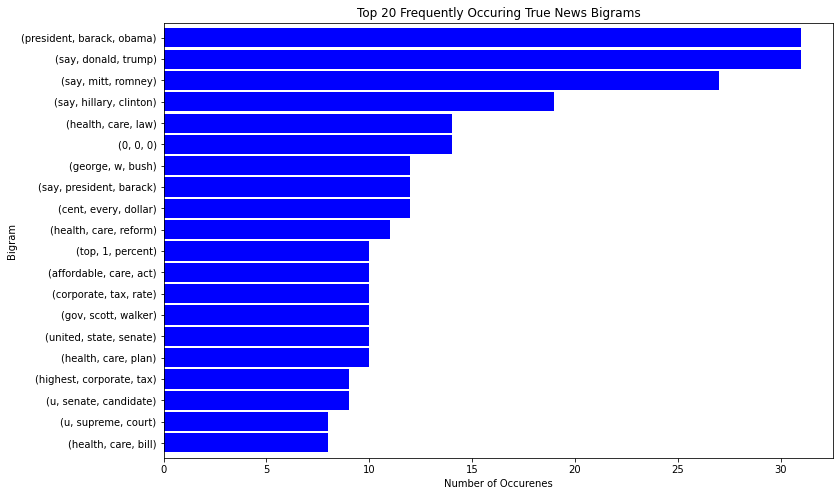

In [ ]:
# Trigram
plot_top_ngrams(reliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=3)

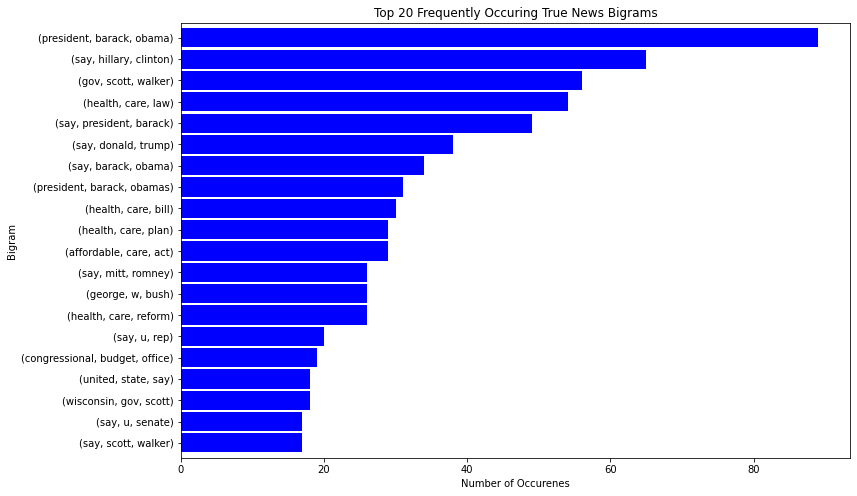

In [ ]:
plot_top_ngrams(unreliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=3)

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.1 MB/s 
     |████████████████████████████████| 880 kB 44.4 MB/s 
     |████████████████████████████████| 596 kB 53.1 MB/s 
     |████████████████████████████████| 6.6 MB 45.6 MB/s 
     |████████████████████████████████| 77 kB 6.8 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=52391f879c97d8464cfe0e42bfcf2dc0a20c0d5e9bbc40158a3c1e429d782e4c
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
import random

In [ ]:
def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(123)

In [ ]:
model_name = "bert-base-uncased"
max_length= 512

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
data.head()

text  label
0  say annies list political group support thirdt...      1
1  decline coal start started natural gas took st...      1
2  hillary clinton agrees john mccain voting give...      0
3  health care reform legislation likely mandate ...      1
4               economic turnaround started end term      1

In [ ]:
## Data Preparation
data = data[data['text'].notna()]


In [ ]:
def prepare_data(df, test_size=0.2, include_title=True, include_author=True):
    texts = []
    labels = []
    
    for i in range(len(df)):
        text = df['text'].iloc[i]
        label = df['label'].iloc[i]
        
        if text and label in [0,1]:
            texts.append(text)
            labels.append(label)
            
    return train_test_split(texts, labels, test_size=test_size)

train_texts, valid_texts, train_labels, valid_labels = prepare_data(data)

In [ ]:
print(len(train_texts), len(train_labels))
print(len(valid_texts), len(valid_labels))

8192 8192
2048 2048


In [ ]:
# tokenizing the dataset
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

In [ ]:
# converting the encoding into a PyTorch datset
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor([self.labels[idx]])
        return item
    
    def __len__(self):
        return len(self.labels)
    
# convert tokenize data into torch dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [ ]:
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from sklearn.metrics import accuracy_score

def computer_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    acc = accuracy_score(labels, preds)
    
    return {'accuracy':acc,}

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=10,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=200,               # log & save weights each logging_steps
    save_steps=200,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

In [ ]:
trainer = Trainer(
    model = model,
    args = training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=computer_metrics,
)

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 8192
  Num Epochs = 1
  Instantaneous batch size per device = 10
  Total train batch size (w. parallel, distributed & accumulation) = 10
  Gradient Accumulation steps = 1
  Total optimization steps = 820


***** Running Evaluation *****
  Num examples = 2048
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-200
Configuration saved in ./results/checkpoint-200/config.json
Model weights saved in ./results/checkpoint-200/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 2048
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-400
Configuration saved in ./results/checkpoint-400/config.json
Model weights saved in ./results/checkpoint-400/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 2048
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-600
Configuration saved in ./results/checkpoint-600/config.json
Model weights saved in ./results/checkpoint-600/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 2048
  Batch size = 20
Saving model checkpoint to ./results/checkpoint-800
Configuration saved in ./results/checkpoint-800/config.json
Model weights saved in ./results/checkpoint-800/pytorch_model.bin


Tr

TrainOutput(global_step=820, training_loss=0.6562186427232696, metrics={'train_runtime': 796.5809, 'train_samples_per_second': 10.284, 'train_steps_per_second': 1.029, 'total_flos': 2155405765509120.0, 'train_loss': 0.6562186427232696, 'epoch': 1.0})

In [ ]:
# evaluate the current model after training
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 2048
  Batch size = 20


{'epoch': 1.0,
 'eval_accuracy': 0.6416015625,
 'eval_loss': 0.63264000415802,
 'eval_runtime': 6.5951,
 'eval_samples_per_second': 310.533,
 'eval_steps_per_second': 15.618}

In [ ]:
# saving the fine tuned model & tokenizer
model_path = "fake-news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Configuration saved in fake-news-bert-base-uncased/config.json
Model weights saved in fake-news-bert-base-uncased/pytorch_model.bin
tokenizer config file saved in fake-news-bert-base-uncased/tokenizer_config.json
Special tokens file saved in fake-news-bert-base-uncased/special_tokens_map.json


('fake-news-bert-base-uncased/tokenizer_config.json',
 'fake-news-bert-base-uncased/special_tokens_map.json',
 'fake-news-bert-base-uncased/vocab.txt',
 'fake-news-bert-base-uncased/added_tokens.json',
 'fake-news-bert-base-uncased/tokenizer.json')

In [ ]:
def get_prediction(text, convert_to_label=False):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
        return d[int(probs.argmax())]
    else:
        return int(probs.argmax())

In [ ]:
real_news = """
Says the Annies List political group supports third-trimester abortions on demand. <SNIPPED>
"""

get_prediction(real_news, convert_to_label=True)

'fake'

In [ ]:
# read the test set
test_df = test
# make a copy of the testing set
new_df = test_df.copy()
# add a new column that contains the author, title and article content
new_df["new_text"] = new_df["text"].astype(str)
# get the prediction of all the test set
new_df["label"] = new_df["new_text"].apply(get_prediction)
# make the submission file
final_df = new_df[["text", "label"]]
final_df.to_csv("submit_final-LIAR.csv", index=False)